In [10]:
import warnings
warnings.filterwarnings('ignore')

import csv
import pandas as pd
import datetime
import time

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams #Size of plots
from sklearn.cluster import MiniBatchKMeans, KMeans #Clustering
import math
import pickle
import os

import xgboost as xgb
import networkx as nx

p_after_eda = 'sandydata/after_eda/'

In [14]:
if not os.path.isfile(f'{p_after_eda}train_woheader.csv'):
    traincsv = pd.read_csv('sandydata/train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print('Number of duplicate entries:', sum(traincsv.duplicated()))
    traincsv.to_csv(f'{p_after_eda}train_woheader.csv', header=False, index=False)
    print('saved the graph into file')
else:
    g = nx.read_edgelist(f'{p_after_eda}train_woheader.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)
    print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


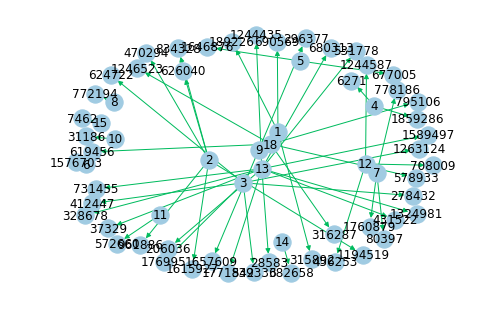

In [18]:
if not os.path.isfile('train_woheader_sample.csv'):
    pd.read_csv('sandydata/train.csv', nrows=25).to_csv('train_woheader_sample.csv', header=False, index=False)
    
subgraph = nx.read_edgelist('train_woheader_sample.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)

pos = nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2', edge_color='#00bb5e', width=1, edge_cmap=plt.cm.Blues, with_labels=True)
plt.savefig('graph_sample.pdf')
print(nx.info(subgraph))